# 2章

In [1]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import japanize_matplotlib

import sys
sys.path.append('../src')
import activation as act

## 2.1 ユニットと活性化関数

活性化関数として主に3種類紹介

- ReLU: 値域 $[0, \infty)$
  $$
  f(x) = \max \left\{0, x\right\}
  $$
  
  変種としてPReLU, LeakyReLUがある。 
  
  どちらも$x < 0$のとき$ax$として出力するが、PReLUは$a$を学習し、LeakyReLUは$a$を定数とする。
- sigmoid: 値域 $(0, 1)$
  $$
  f(x) = \frac{1}{1+\exp(-x)}
  $$
- hyperbolic tangent: 値域 $(-1, 1)$
  $$
  f(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}
  $$


シグモイドとtanhはどちらも入力の絶対値がおおきくなると、出力が飽和するが、ReLUは入力が正の限り、そうしたことがない。

In [11]:
input_list = np.array([-5 + 0.1 * i for i in range(101)])
torch_input_list = torch.Tensor(input_list)
# make instance
# ReLU
relu = nn.ReLU()
slope = 0.01
leakey_relu = nn.LeakyReLU(slope)

# sigmoid
sigmoid = nn.Sigmoid()

# tanh
tanh = nn.Tanh()

In [12]:
# 出力

relu_res = relu(torch_input_list)
my_relu_res = act.relu(input_list)

leaky_res = leakey_relu(torch_input_list)
my_leakly_res = act.leaky_relu(input_list, slope=slope)
sig_res = sigmoid(torch_input_list)
my_sig_res = act.sigmoid(input_list)

tanh_res = tanh(torch_input_list)
my_tanh_res = act.tanh(input_list)


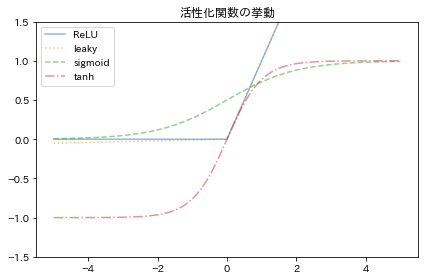

In [22]:
alpha = 0.5
plt.plot(torch_input_list, relu_res, label = 'ReLU', alpha=alpha, linestyle='solid')
plt.plot(torch_input_list, leaky_res, label='leaky', alpha=alpha, linestyle='dotted')
plt.plot(torch_input_list, sig_res, label='sigmoid', alpha=alpha, linestyle ='dashed')
plt.plot(torch_input_list, tanh_res, label='tanh', alpha=alpha, linestyle='dashdot')
plt.ylim([-1.5, 1.5])
plt.legend()
plt.title('活性化関数の挙動')
plt.tight_layout()

## 2.2 FFN

二値分類のケースで2層のFFNを作成する

In [ ]:
class TwoLayer(nn.Module):
    # TwoLayer Model for Binary classification
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.a1 = nn.ReLU()  # ReLU
        self.l2 = nn.Linear(hidden_dim, output_dim)
        self.a2 = nn.Sigmoid()

        self.layers = [self.l1, self.a1, self.l2, self.a2]

    def forward(self, x):

        for layer in self.layers:
            x = layer(x)

        return x
